import seaborn as sns
# Outlier - Example

In [41]:
import pandas
import numpy
import seaborn as sns

# Read file

In [45]:
#https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle
df = pandas.read_csv('data/vehicles_messy.csv', low_memory=False)
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [46]:
df[['cylinders','barrels08']].head()

,cylinders,barrels08
0,4.0,15.695714
1,12.0,29.964545
2,4.0,12.207778
3,8.0,29.964545
4,4.0,17.347895


c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


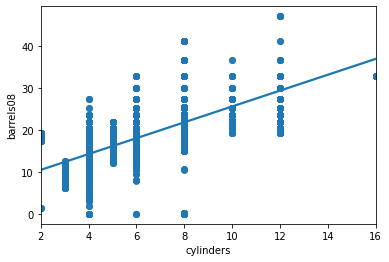

In [44]:
sns.regplot(df['cylinders'], df['barrels08']);

In [47]:
# Let's analyse the correlation between cylinders and barrels
X = df[['cylinders']].sample(5000, random_state=0).fillna(0).copy()
y = df['barrels08'].loc[X.index].copy()

In [7]:
X.head()

,cylinders
10391,8.0
15339,6.0
10544,4.0
23971,6.0
13178,4.0


In [8]:
y.head()

10391    29.964545
15339    19.109250
10544    14.982273
23971    16.480500
13178    13.733750
Name: barrels08, dtype: float64

# Visualize variables

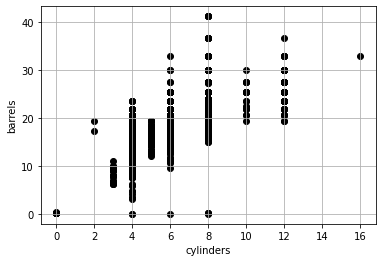

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X, y,  color='k')
plt.xlabel('cylinders')
plt.ylabel('barrels')
plt.grid()
plt.show()

In [10]:
import pandas as pd

In [48]:
# Perform Linear Regression
from sklearn.linear_model import LinearRegression

lr_no_outlier = LinearRegression()
lr_no_outlier.fit(X, y)

LinearRegression()

In [49]:
lr_no_outlier.intercept_

6.361973550949077

In [50]:
lr_no_outlier.coef_[0]

1.9661852484524853

barrels08_predicted = intercept +  coef * cylinders 

In [51]:
lr_no_outlier.predict(X)

array([22.09145554, 18.15908504, 14.22671454, ..., 14.22671454,
       22.09145554, 14.22671454])

In [52]:
# Make predictions
predicted_values_no_outlier = lr_no_outlier.predict(X)

print(f'Barrels08= {lr_no_outlier.intercept_:.2f} + {lr_no_outlier.coef_[0]:.2f} * cylinders')

Barrels08= 6.36 + 1.97 * cylinders


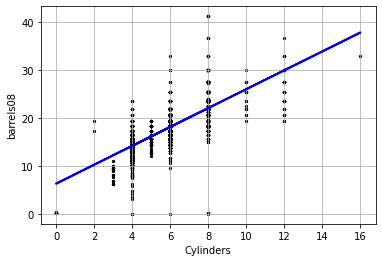

In [16]:
import matplotlib.pyplot as plt

# Plot outputs
plt.scatter(X, y,  color='k', s=5)
plt.plot(X, predicted_values_no_outlier, color='blue', linewidth=2)

plt.xlabel('Cylinders')
plt.ylabel('barrels08')
plt.grid()
plt.show()

# Include Outlier

In [53]:
y

10391    29.964545
15339    19.109250
10544    14.982273
23971    16.480500
13178    13.733750
           ...    
23188    11.365862
13360    29.964545
22376    13.184400
37092    23.543571
32485    21.974000
Name: barrels08, Length: 5000, dtype: float64

In [54]:
y.iloc[2] = 2000
y

10391      29.964545
15339      19.109250
10544    2000.000000
23971      16.480500
13178      13.733750
            ...     
23188      11.365862
13360      29.964545
22376      13.184400
37092      23.543571
32485      21.974000
Name: barrels08, Length: 5000, dtype: float64

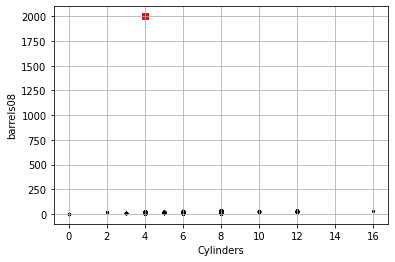

In [55]:
y.iloc[2] = 2000

# Plot variables
plt.scatter(X, y,  color='k', s=5)
plt.scatter(X.iloc[2], y.iloc[2], color='red', marker='s')

plt.xlabel('Cylinders')
plt.ylabel('barrels08')

plt.grid()
plt.show()

In [56]:
# Perform Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Make predictions
predicted_values_outliers = lr.predict(X)

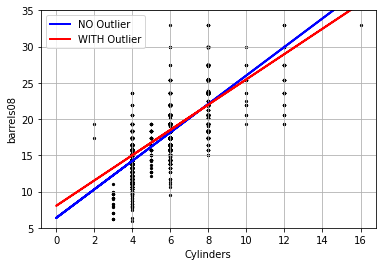

Equação: 6.36 + 1.97 * cylinders
Equação: 8.03 + 1.75 * cylinders


In [57]:
# Plot outputs
plt.scatter(X, y,  color='k', s=5)
plt.scatter(X.iloc[2], y.iloc[2], color='red', marker='s')

plt.plot(X, predicted_values_no_outlier , color='blue', linewidth=2)
plt.plot(X, predicted_values_outliers, color='red', linewidth=2)


plt.xlabel('Cylinders')
plt.ylabel('barrels08')

plt.ylim([5, 35])
plt.grid()
plt.legend(['NO Outlier','WITH Outlier'])
plt.show()

print(f'Equação: {lr_no_outlier.intercept_:.2f} + {lr_no_outlier.coef_[0]:.2f} * cylinders')
print(f'Equação: {lr.intercept_:.2f} + {lr.coef_[0]:.2f} * cylinders')

In [35]:
lr_no_outlier.intercept_ + lr_no_outlier.coef_[0] * 10

26.02382603547393

## Extra: Robust Regressor

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


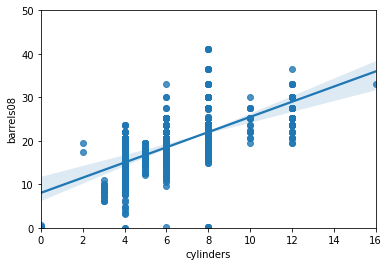

In [60]:
sns.regplot(X, y)
plt.ylim([0, 50]);

c:\users\raian\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50.0)

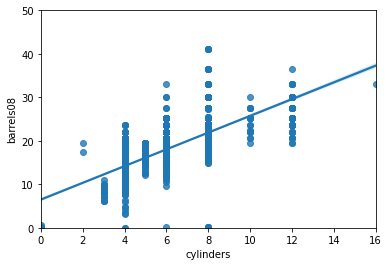

In [38]:
# sns.regplot(X, y)
sns.regplot(X, y, robust=True)
plt.ylim([0, 50])

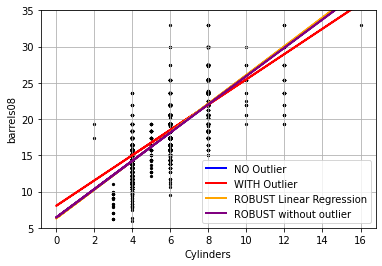

Equação: 6.36 + 1.97 * cylinders
Equação: 8.03 + 1.75 * cylinders


In [59]:

from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor()
model.fit(X, y)
model2= RANSACRegressor()
model2.fit(X[3:], y[3:])

# Plot outputs
plt.scatter(X, y,  color='k', s=5)
plt.scatter(X.iloc[2], y.iloc[2], color='red', marker='s')

plt.plot(X, predicted_values_no_outlier , color='blue', linewidth=2)
plt.plot(X, predicted_values_outliers, color='red', linewidth=2)
plt.plot(X, model.predict(X), color='orange', linewidth=2)
plt.plot(X[3:], model2.predict(X[3:]), color='purple', linewidth=2)


plt.xlabel('Cylinders')
plt.ylabel('barrels08')

plt.ylim([5, 35])
plt.grid()
plt.legend(['NO Outlier','WITH Outlier', 'ROBUST Linear Regression','ROBUST without outlier'])
plt.show()

print(f'Equação: {lr_no_outlier.intercept_:.2f} + {lr_no_outlier.coef_[0]:.2f} * cylinders')
print(f'Equação: {lr.intercept_:.2f} + {lr.coef_[0]:.2f} * cylinders')